### Week 8 Exercises <br> Michael Hotaling <br> 2020-10-21

## Exercise 9.1 

As sample size increases, the power of a hypothesis test increases, which means it is more likely to be positive if the effect is real. Conversely, as sample size decreases, the test is less likely to be positive even if the effect is real.

To investigate this behavior, run the tests in this chapter with different subsets of the NSFG data. You can use `thinkstats2.SampleRows` to select a random subset of the rows in a DataFrame.

What happens to the p-values of these tests as sample size decreases? What is the smallest sample size that yields a positive test?

In [1]:
import nsfg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so

In [2]:
df = nsfg.ReadFemPreg()

In [3]:
df = df[df['outcome'] == 1]

In [4]:
first = df[df['birthord'] == 1]
other = df[df['birthord'] != 1]

In [5]:
def exercise_9(arr1, arr2, samples):
    sample_arr1 = np.random.choice(arr1, samples)
    sample_arr2 = np.random.choice(arr2, samples)
    return(ss.ttest_ind(sample_arr1,  sample_arr2)[1])

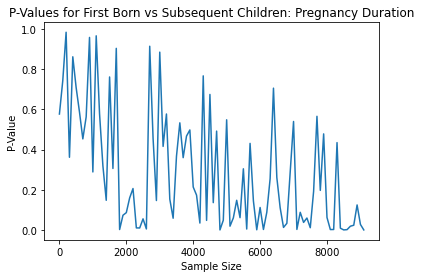

In [6]:
chart =[]
samples = np.arange(10,len(df),100)

for i in np.arange(10,len(df),100):
    chart.append(exercise_9(first['prglngth'], other['prglngth'], samples = i))
plt.plot(samples,chart)
plt.title("P-Values for First Born vs Subsequent Children: Pregnancy Duration");
plt.xlabel("Sample Size");
plt.ylabel("P-Value");

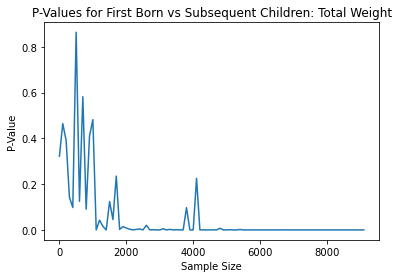

In [7]:
chart =[]
samples = np.arange(10,len(df),100)

for i in samples:
    chart.append(exercise_9(first['totalwgt_lb'].dropna(), other['totalwgt_lb'].dropna(), samples = i))
plt.plot(samples, chart)
plt.title("P-Values for First Born vs Subsequent Children: Total Weight");
plt.xlabel("Sample Size");
plt.ylabel("P-Value");

In [8]:
def exercise_92(df, samples):
    sample_df = df.sample(samples, replace = True)
    age = sample_df['agepreg']
    total_wgt = sample_df['totalwgt_lb']
    return ss.pearsonr(age, total_wgt)[1]

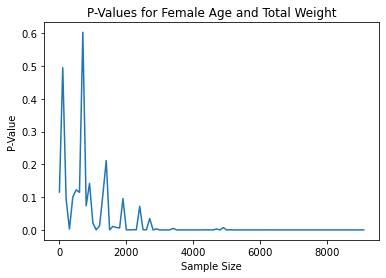

In [9]:
new_df = df.dropna(subset=['agepreg', 'totalwgt_lb'])

chart =[]
samples = np.arange(10,len(df),100)

for i in samples:
    chart.append(exercise_92(new_df, samples = i))
plt.plot(samples, chart)
plt.title("P-Values for Female Age and Total Weight");
plt.xlabel("Sample Size");
plt.ylabel("P-Value");

For strongly correlated variables like `totalwgt_lb` between first and subsequent children and `agepreg` and `totalwgt_lb`, we see that our p-value eventually stabilizes and shows a positive results. When we decrease our sample size, we can see that the results become erratic. For other non-correlated variables, the results are always erratic, but some p-values show up as positive results. This could be a problem in the real world

## Exercise 10.1

Using the data from the BRFSS, compute the linear least squares fit for `log(weight)` versus `height`. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?

In [10]:
import brfss
import thinkstats2
import thinkplot

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)

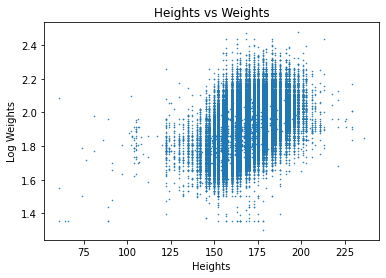

In [11]:
plt.scatter(x = heights, y = log_weights, s = 0.3)
plt.title("Heights vs Weights")
plt.xlabel("Heights")
plt.ylabel("Log Weights");

In [12]:
model = ss.linregress(heights, log_weights)

m = model[0]
b = model[1]

model

LinregressResult(slope=0.00528145416941777, intercept=0.9930804163932888, rvalue=0.5317282605983428, pvalue=0.0, stderr=1.3370549498879915e-05)

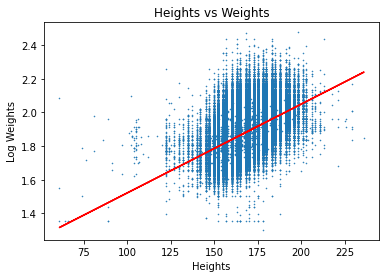

In [13]:
plt.scatter(x = heights, y = log_weights, s = 0.3);
plt.plot(heights, (heights * m) + b, c = "red")
plt.title("Heights vs Weights")
plt.xlabel("Heights")
plt.ylabel("Log Weights");

Make the same plot but apply the inverse transform to show weights on a linear (not log) scale.

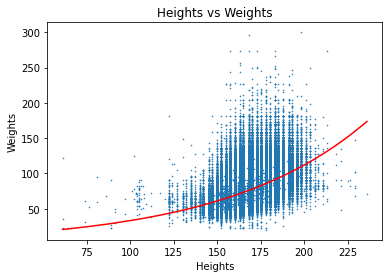

In [14]:
plt.scatter(x = heights, y = 10 ** log_weights , s = 0.3);
plt.plot(np.sort(heights), 10 **((np.sort(heights) * m) + b), c = "red")
plt.title("Heights vs Weights")
plt.xlabel("Heights")
plt.ylabel("Weights");

In [15]:
lower_range = []
middle_range = []
upper_range = []

bin = 20

for i in np.arange(min(heights),max(heights),bin):
    temp = df[df['htm3'] >= i]
    temp = temp[temp['htm3'] < (i + bin)]
    lower_range.append(np.percentile((temp['wtkg2']), 10))
    middle_range.append(np.percentile((temp['wtkg2']), 50))
    upper_range.append(np.percentile((temp['wtkg2']), 90))


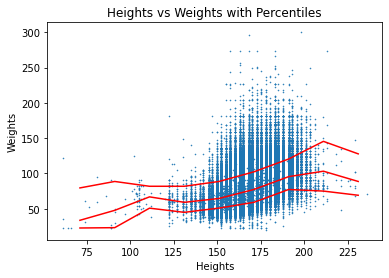

In [16]:
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), lower_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), middle_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), upper_range, color = "red")
plt.scatter(x = heights, y = weights, s = 0.3);
plt.title("Heights vs Weights with Percentiles")
plt.xlabel("Heights")
plt.ylabel("Weights");

Plot percentiles of the residuals.

In [17]:
# Residuals
df['predicted_values'] = 10 ** (df['htm3'] * m + b)
df['residuals'] = df['wtkg2'] -df['predicted_values'] 

# Log Residuals
df['log_predicted'] = (df['htm3'] * m + b)
df['log_residuals'] = np.log10(df['wtkg2']) - df['log_predicted']

In [18]:
lower_range = []
middle_range = []
upper_range = []

bin = 20

for i in np.arange(min(heights),max(heights),bin):
    temp = df[df['htm3'] >= i]
    temp = temp[temp['htm3'] < (i + bin)]
    lower_range.append(np.percentile((temp['residuals']), 10))
    middle_range.append(np.percentile((temp['residuals']), 50))
    upper_range.append(np.percentile((temp['residuals']), 90))


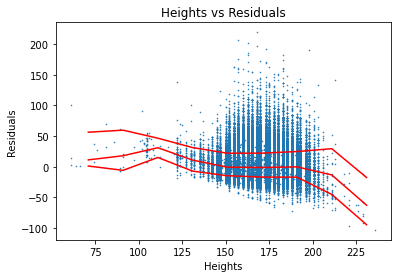

In [19]:
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), lower_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), middle_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), upper_range, color = "red")
plt.scatter(x = df['htm3'], y = df['residuals'], s = 0.3);
plt.title("Heights vs Residuals")
plt.xlabel("Heights")
plt.ylabel("Residuals");

In [20]:
lower_range = []
middle_range = []
upper_range = []

bin = 10

for i in np.arange(min(heights),max(heights),bin):
    temp = df[df['htm3'] >= i]
    temp = temp[temp['htm3'] < (i + bin)]
    lower_range.append(np.percentile((temp['log_residuals']), 10))
    middle_range.append(np.percentile((temp['log_residuals']), 50))
    upper_range.append(np.percentile((temp['log_residuals']), 90))


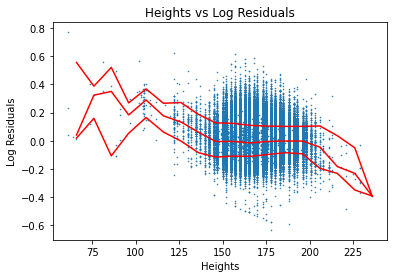

In [21]:
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), lower_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), middle_range, color = "red")
plt.plot(np.arange(min(heights),max(heights),bin) + (bin/2), upper_range, color = "red")
plt.scatter(x = df['htm3'], y = df['log_residuals'], s = 0.3);
plt.title("Heights vs Log Residuals")
plt.xlabel("Heights")
plt.ylabel("Log Residuals");

Compute correlation.

In [22]:
corr = ss.pearsonr(df['htm3'], df['wtkg2'])[0]
print("Height and Weight:", corr)

log_corr = ss.pearsonr(df['htm3'], np.log10(df['wtkg2']))[0]
print("Height and Log Weight:", log_corr)

Height and Weight: 0.5087364789734645
Height and Log Weight: 0.5317282605984366


Compute coefficient of determination.

In [23]:
correlation_matrix = np.corrcoef(df['htm3'], df['wtkg2'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.2588128050383118


In [24]:
correlation_matrix = np.corrcoef(df['htm3'], np.log10(df['wtkg2']))
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.2827349431189391


Confirm that $R^2 = \rho^2$.

In [25]:
print(log_corr ** 2)
print(r_squared)
print("Close enough!")

0.2827349431190389
0.2827349431189391
Close enough!


Compute Std(ys), which is the RMSE of predictions that don't use height.

In [26]:
residual_stdev_ys = np.std(df['wtkg2'])
print(residual_stdev_ys)

residual_stdev_log_ys = np.std(np.log10(df['wtkg2']))
print(residual_stdev_log_ys)

19.547865356175198
0.1032072503000489


Compute Std(res), the RMSE of predictions that do use height.

In [27]:
residual_stdev = np.std(df['residuals'])
print(residual_stdev)

residual_stdev_log = np.std(df['log_residuals'])
print(residual_stdev_log)

16.784161057644237
0.08740777080416087


How much does height information reduce RMSE?

In [28]:
1 - residual_stdev / residual_stdev_ys

0.14138138605798722

In [29]:
1 - residual_stdev_log / residual_stdev_log_ys

0.15308497658793396